**Table of Contents** <br>
* [1. Imports](#imports)
* [2. K-Prototypes](#2)
* [3. K-Means](#3)
* [4. K-Medoids](#4)



<hr>
<a class="anchor" id="Imports">
    
# 1. Imports
    
</a>

#### Initial Note:
Code from cells without a specific source mentioned is either original or adapted from: https://github.com/joaopfonseca/Data-Mining-22-23

In [151]:
#!pip install kmodes
#!pip install graphviz
import graphviz
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import KNNImputer
sns.set()
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
import umap
from mpl_toolkits.mplot3d import Axes3D
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.metrics import calinski_harabasz_score
import seaborn as sb
from kmodes.kprototypes import KPrototypes
from matplotlib.lines import Line2D
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans


from sklearn_extra.cluster import KMedoids
# ! pip install scikit-learn-extra
# ! pip install sklearn-extra

In [45]:
df = pd.read_csv('df.csv',index_col=[0])

In [20]:
df_outliers_ohc = pd.read_csv('df_outliers_ohc.csv',index_col=[0])

In [21]:
df.head()

,ClaimsRate,Age,MotorPercentageSpent,HouseholdPercentageSpent,HealthPercentageSpent,LifePercentageSpent,WorkPercentageSpent,SalarySpent,EducDeg_2.0,EducDeg_3.0,EducDeg_4.0,Children_1,Cancelled_1
CustID,,,,,,,,,,,,,
1.0,-0.559322,-0.482759,0.357075,-0.257555,0.012021,0.619809,-0.177071,-0.140650,1.0,0.0,0.0,1.0,0.0
2.0,0.677966,-0.965517,-0.865761,0.978485,-0.588569,3.104708,1.449848,-1.225286,1.0,0.0,0.0,1.0,0.0
3.0,-0.745763,-0.103448,-0.372926,0.415420,-0.326120,1.419295,1.756908,-0.224922,0.0,0.0,0.0,0.0,0.0
4.0,0.457627,-0.482759,-0.308089,-0.430432,1.962267,0.414575,0.212183,-0.759114,0.0,1.0,0.0,1.0,0.0
5.0,0.305085,-0.206897,0.289338,-0.416528,0.471710,-0.089648,0.545922,-0.341952,0.0,1.0,0.0,1.0,0.0


In [22]:
df_outliers_ohc.head()

,ClaimsRate,Age,MotorPercentageSpent,HouseholdPercentageSpent,HealthPercentageSpent,LifePercentageSpent,WorkPercentageSpent,SalarySpent,EducDeg_2.0,EducDeg_3.0,EducDeg_4.0,Children_1
CustID,,,,,,,,,,,,
52.0,6.234544,0.821705,2.026776,-0.438482,-0.261338,-0.089257,-0.800124,2.817521,0.0,1.0,0.0,1.0
113.0,3.759082,0.418605,1.903978,-0.490234,-0.024285,-0.095918,-0.186179,1.859967,0.0,0.0,1.0,1.0
136.0,3.542384,0.139535,0.773943,-0.060141,0.501841,0.588865,-0.599826,1.163966,0.0,1.0,0.0,1.0
150.0,-0.070108,-0.046512,0.007735,0.016679,-0.314962,-0.027620,10.410992,0.025863,0.0,0.0,0.0,1.0
172.0,65.084767,0.108527,1.203981,-0.260292,0.829942,-0.080349,-0.000334,0.287343,0.0,1.0,0.0,1.0


<hr>
<a class="anchor" id="2">
    
# 2. K-Prototypes
    
</a>

In [146]:
insurance_features_ohc=[
    'MotorPercentageSpent',
    'HouseholdPercentageSpent',
    'HealthPercentageSpent',
    'LifePercentageSpent',
    'WorkPercentageSpent',
    'Cancelled_1',
    "ClaimsRate"
]


dfInsurance=df[insurance_features_ohc]


demographic_features_ohc=[
    'SalarySpent',
    'Children_1',
    'EducDeg_2.0',
    'EducDeg_3.0',
    'EducDeg_4.0',
    'Age'
]
dfDemographic=df[demographic_features_ohc]

## dfDemographic

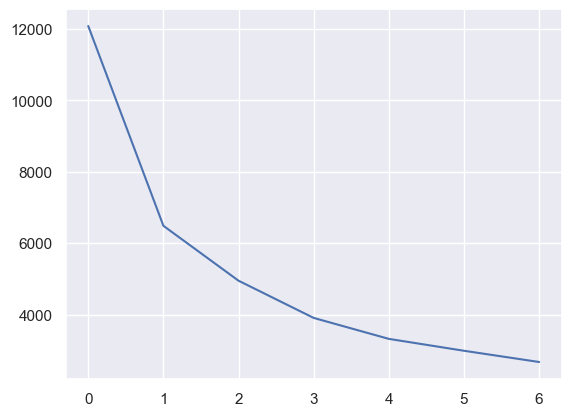

In [147]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(dfDemographic, categorical=[1,2,3,4])
    cost.append(kproto.cost_)

plt.plot(cost)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2794, ncost: 6489.659805579648
Run: 1, iteration: 2/100, moves: 171, ncost: 6487.033366094431
Run: 1, iteration: 3/100, moves: 49, ncost: 6486.533997894754
Run: 1, iteration: 4/100, moves: 20, ncost: 6486.462572491543
Run: 1, iteration: 5/100, moves: 5, ncost: 6486.454173142343
Run: 1, iteration: 6/100, moves: 4, ncost: 6486.451017196835
Run: 1, iteration: 7/100, moves: 0, ncost: 6486.451017196835
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1435, ncost: 6526.222063650207
Run: 2, iteration: 2/100, moves: 454, ncost: 6491.19948983449
Run: 2, iteration: 3/100, moves: 139, ncost: 6487.358558873557
Run: 2, iteration: 4/100, moves: 56, ncost: 6486.618943372262
Run: 2, iteration: 5/100, moves: 26, ncost: 6486.4797184159
Run: 2, iteration: 

Run: 3, iteration: 6/100, moves: 32, ncost: 5087.709161270694
Run: 3, iteration: 7/100, moves: 11, ncost: 5087.690514870351
Run: 3, iteration: 8/100, moves: 10, ncost: 5087.6727897340825
Run: 3, iteration: 9/100, moves: 10, ncost: 5087.66050041502
Run: 3, iteration: 10/100, moves: 1, ncost: 5087.660300637891
Run: 3, iteration: 11/100, moves: 0, ncost: 5087.660300637891
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 2566, ncost: 5344.61408326159
Run: 4, iteration: 2/100, moves: 1360, ncost: 5151.569935857615
Run: 4, iteration: 3/100, moves: 688, ncost: 5102.148426438649
Run: 4, iteration: 4/100, moves: 301, ncost: 5091.851920085228
Run: 4, iteration: 5/100, moves: 162, ncost: 5088.682418267928
Run: 4, iteration: 6/100, moves: 76, ncost: 5088.003474875056
Run: 4, iteration: 7/100, moves: 49, ncost: 5087.753515996043
Run: 4, iteration: 8/100, moves: 25, ncost: 5087.698382019191
Run: 4, iteration: 9/100, moves: 14, ncost: 50

Run: 4, iteration: 4/100, moves: 432, ncost: 3907.2204852370132
Run: 4, iteration: 5/100, moves: 136, ncost: 3905.009024210593
Run: 4, iteration: 6/100, moves: 68, ncost: 3904.4673219036445
Run: 4, iteration: 7/100, moves: 34, ncost: 3904.338959143383
Run: 4, iteration: 8/100, moves: 16, ncost: 3904.3185163835615
Run: 4, iteration: 9/100, moves: 2, ncost: 3904.317295098867
Run: 4, iteration: 10/100, moves: 6, ncost: 3904.3128139600176
Run: 4, iteration: 11/100, moves: 2, ncost: 3904.3121568666566
Run: 4, iteration: 12/100, moves: 2, ncost: 3904.3108953327255
Run: 4, iteration: 13/100, moves: 1, ncost: 3904.310661093025
Run: 4, iteration: 14/100, moves: 0, ncost: 3904.310661093025
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 2686, ncost: 4064.6065186707783
Run: 5, iteration: 2/100, moves: 1362, ncost: 3925.1955103637715
Run: 5, iteration: 3/100, moves: 436, ncost: 3907.950758812508
Run: 5, iteration: 4/100, moves: 163, 

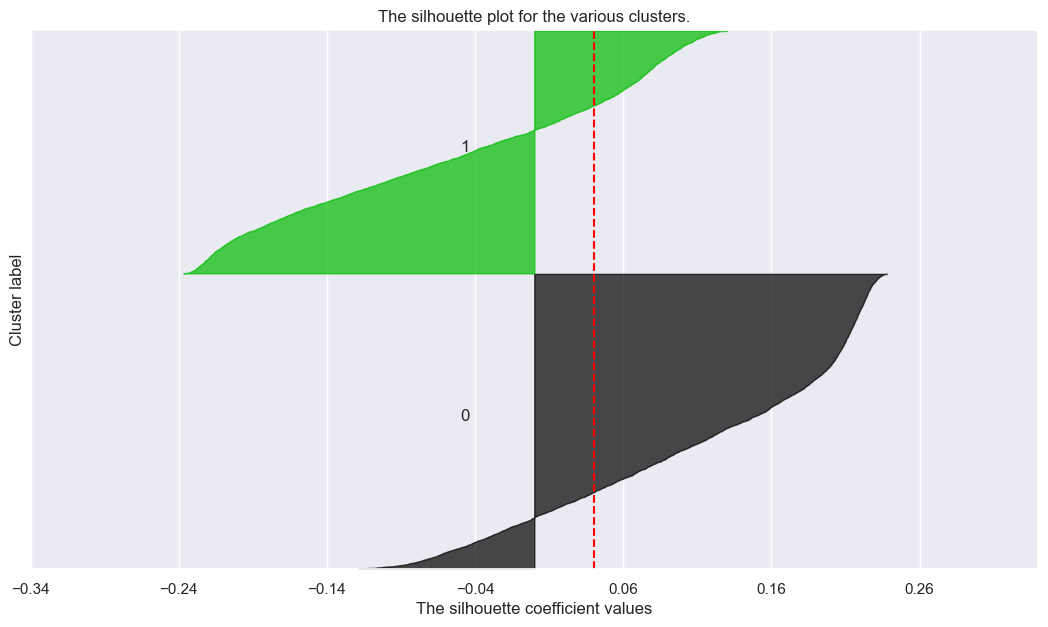

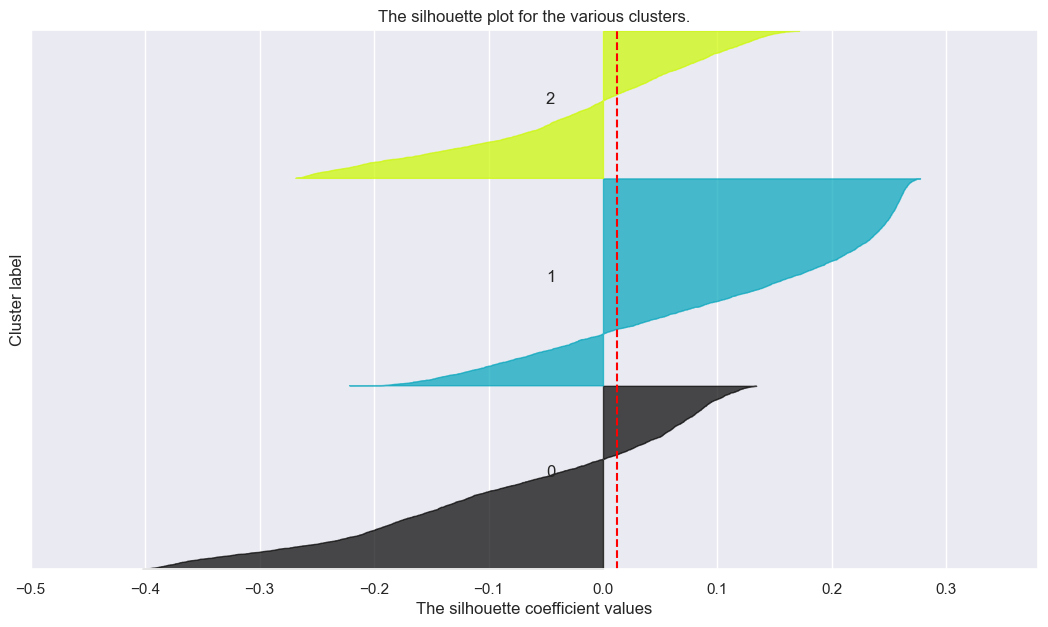

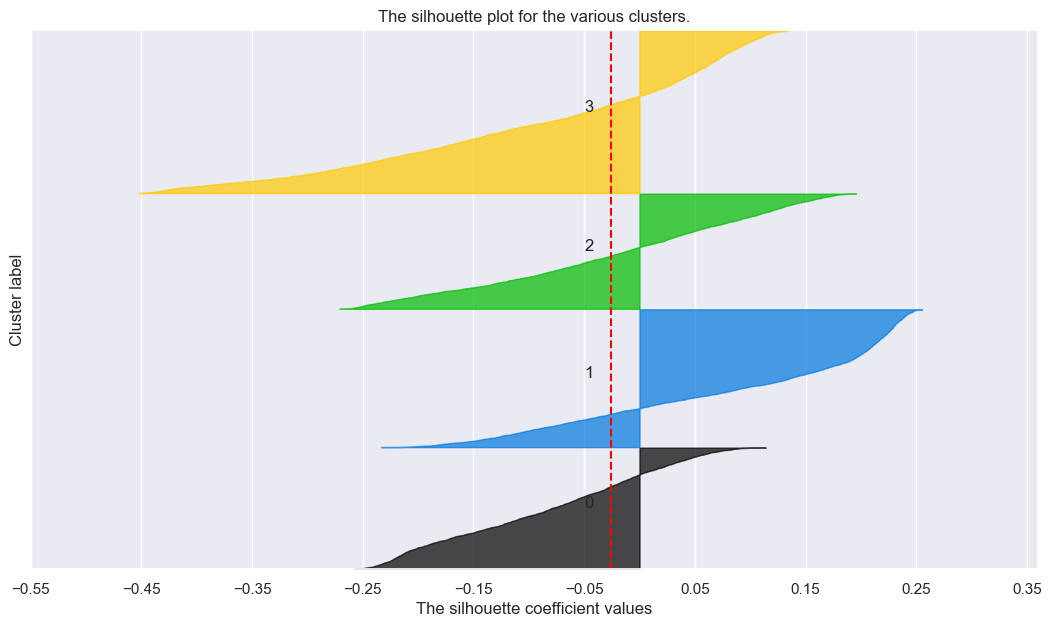

In [148]:
range_clusters = range(2, 5)

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kproto = KPrototypes(n_clusters=nclus, init='Cao',verbose=2, random_state=1)
    cluster_labels = kproto.fit_predict(dfDemographic,categorical=[1,2,3,4])
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(dfInsurance, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfInsurance, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(dfInsurance) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [25]:
kp_dem = KPrototypes(n_clusters=3, init='Cao', n_init=5, verbose=1)

# Fit the model to the data
kp_dem.fit(dfDemographic, categorical=[1,2,3,4])

# Predict the clusters for each data point
clusters_dem = kp_dem.predict(dfDemographic, categorical=[1,2,3,4])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2846, ncost: 5297.033547486813
Run: 1, iteration: 2/100, moves: 1183, ncost: 5109.3885455619475
Run: 1, iteration: 3/100, moves: 574, ncost: 5092.7529061356445
Run: 1, iteration: 4/100, moves: 192, ncost: 5088.884827598649
Run: 1, iteration: 5/100, moves: 91, ncost: 5088.029873011702
Run: 1, iteration: 6/100, moves: 53, ncost: 5087.756456101533
Run: 1, iteration: 7/100, moves: 26, ncost: 5087.698382019192
Run: 1, iteration: 8/100, moves: 14, ncost: 5087.676924692882
Run: 1, iteration: 9/100, moves: 10, ncost: 5087.661932271594
Run: 1, iteration: 10/100, moves: 3, ncost: 5087.6603006378855
Run: 1, iteration: 11/100, moves: 0, ncost: 5087.6603006378855
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2760, ncost: 4988.231397672179
Run: 2, 

In [26]:
df_concat = pd.concat((dfDemographic, pd.Series(clusters_dem , name='labels_demographic')), axis=1)
df_concat.groupby('labels_demographic').mean()

,SalarySpent,Children_1,EducDeg_2.0,EducDeg_3.0,EducDeg_4.0,Age
labels_demographic,,,,,,
0.0,-0.016923,0.705529,0.333429,0.474936,0.068462,-0.024042
1.0,-0.022777,0.722222,0.341727,0.469225,0.069544,-0.034276
2.0,-0.030402,0.694076,0.356426,0.457430,0.068631,-0.020440


In [28]:
pd.DataFrame(clusters_dem)[0].value_counts() #donors are well distributed be

0    3939
2    3483
1    2800
Name: 0, dtype: int64

## dfInsurance

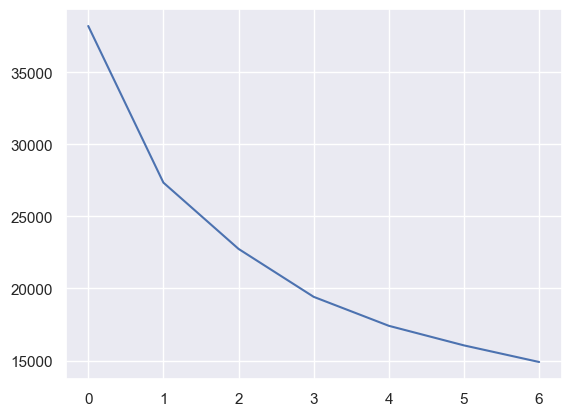

In [149]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(dfInsurance, categorical=[5])
    cost.append(kproto.cost_)

plt.plot(cost)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1544, ncost: 27587.23801095548
Run: 1, iteration: 2/100, moves: 502, ncost: 27451.925700875472
Run: 1, iteration: 3/100, moves: 320, ncost: 27387.41718260206
Run: 1, iteration: 4/100, moves: 208, ncost: 27361.910454349905
Run: 1, iteration: 5/100, moves: 129, ncost: 27351.630977362904
Run: 1, iteration: 6/100, moves: 62, ncost: 27349.670293085168
Run: 1, iteration: 7/100, moves: 24, ncost: 27349.318883803277
Run: 1, iteration: 8/100, moves: 16, ncost: 27349.152764683553
Run: 1, iteration: 9/100, moves: 10, ncost: 27349.075058681345
Run: 1, iteration: 10/100, moves: 7, ncost: 27349.05036558345
Run: 1, iteration: 11/100, moves: 1, ncost: 27349.049638017943
Run: 1, iteration: 12/100, moves: 5, ncost: 27349.021595087514
Run: 1, iteration: 13/100, moves: 7, ncost: 27348.989372969525
Run: 1, iteration: 14/

Run: 9, iteration: 4/100, moves: 134, ncost: 27352.79192693085
Run: 9, iteration: 5/100, moves: 71, ncost: 27350.24670947043
Run: 9, iteration: 6/100, moves: 35, ncost: 27349.62152756771
Run: 9, iteration: 7/100, moves: 27, ncost: 27349.205707074732
Run: 9, iteration: 8/100, moves: 18, ncost: 27349.04804902919
Run: 9, iteration: 9/100, moves: 8, ncost: 27349.01338300543
Run: 9, iteration: 10/100, moves: 2, ncost: 27349.00900866159
Run: 9, iteration: 11/100, moves: 3, ncost: 27349.00123794367
Run: 9, iteration: 12/100, moves: 4, ncost: 27348.98720778705
Run: 9, iteration: 13/100, moves: 0, ncost: 27348.98720778705
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 2188, ncost: 28593.49261591863
Run: 10, iteration: 2/100, moves: 1347, ncost: 27468.423569287686
Run: 10, iteration: 3/100, moves: 396, ncost: 27374.042627839364
Run: 10, iteration: 4/100, moves: 169, ncost: 27355.272001899077
Run: 10, iteration: 5/100, moves: 74, 

Run: 5, iteration: 3/100, moves: 515, ncost: 22869.540452740286
Run: 5, iteration: 4/100, moves: 366, ncost: 22797.16393543873
Run: 5, iteration: 5/100, moves: 259, ncost: 22763.695481903054
Run: 5, iteration: 6/100, moves: 147, ncost: 22753.720317355615
Run: 5, iteration: 7/100, moves: 93, ncost: 22750.065719250542
Run: 5, iteration: 8/100, moves: 43, ncost: 22749.16678403735
Run: 5, iteration: 9/100, moves: 25, ncost: 22748.675668273845
Run: 5, iteration: 10/100, moves: 15, ncost: 22748.455189717293
Run: 5, iteration: 11/100, moves: 13, ncost: 22748.35349868246
Run: 5, iteration: 12/100, moves: 5, ncost: 22748.316550522515
Run: 5, iteration: 13/100, moves: 0, ncost: 22748.316550522515
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 2957, ncost: 24333.41319592601
Run: 6, iteration: 2/100, moves: 788, ncost: 24050.336289228333
Run: 6, iteration: 3/100, moves: 663, ncost: 23712.311065902555
Run: 6, iteration: 4/100, moves:

Run: 1, iteration: 13/100, moves: 63, ncost: 21246.870228130912
Run: 1, iteration: 14/100, moves: 25, ncost: 21246.558320072632
Run: 1, iteration: 15/100, moves: 18, ncost: 21246.33126583423
Run: 1, iteration: 16/100, moves: 5, ncost: 21246.28573955189
Run: 1, iteration: 17/100, moves: 7, ncost: 21246.256299025637
Run: 1, iteration: 18/100, moves: 0, ncost: 21246.256299025637
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3702, ncost: 21962.48641733007
Run: 2, iteration: 2/100, moves: 1519, ncost: 21190.218412108614
Run: 2, iteration: 3/100, moves: 1548, ncost: 20273.272512935055
Run: 2, iteration: 4/100, moves: 1297, ncost: 19692.436976894856
Run: 2, iteration: 5/100, moves: 720, ncost: 19547.44258560596
Run: 2, iteration: 6/100, moves: 345, ncost: 19516.008044147013
Run: 2, iteration: 7/100, moves: 155, ncost: 19510.160711415178
Run: 2, iteration: 8/100, moves: 62, ncost: 19509.053701757697
Run: 2, iteration: 9/100, mo

Run: 10, iteration: 7/100, moves: 64, ncost: 19422.9996844842
Run: 10, iteration: 8/100, moves: 58, ncost: 19421.212441609685
Run: 10, iteration: 9/100, moves: 28, ncost: 19420.546540615775
Run: 10, iteration: 10/100, moves: 27, ncost: 19420.225377986335
Run: 10, iteration: 11/100, moves: 12, ncost: 19420.124047290716
Run: 10, iteration: 12/100, moves: 4, ncost: 19420.0979802579
Run: 10, iteration: 13/100, moves: 0, ncost: 19420.0979802579
Best run was number 5
For n_clusters = 4, the average silhouette_score is : 0.22381373358025367
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2839, ncost: 19181.569672910402
Run: 1, iteration: 2/100, moves: 1484, ncost: 18297.20058492152
Run: 1, iteration: 3/100, moves: 627, ncost: 18104.80648784601
Run: 1, iteration: 4/100, moves: 264, ncost: 18074.271915832407
Run: 1, iteration: 5/100, moves: 155, ncost: 180

Run: 6, iteration: 13/100, moves: 26, ncost: 17416.69307864393
Run: 6, iteration: 14/100, moves: 25, ncost: 17415.535880600855
Run: 6, iteration: 15/100, moves: 27, ncost: 17413.996886629255
Run: 6, iteration: 16/100, moves: 39, ncost: 17411.140717923645
Run: 6, iteration: 17/100, moves: 20, ncost: 17410.75196784861
Run: 6, iteration: 18/100, moves: 13, ncost: 17410.382755435883
Run: 6, iteration: 19/100, moves: 22, ncost: 17409.97941466073
Run: 6, iteration: 20/100, moves: 28, ncost: 17409.243661048524
Run: 6, iteration: 21/100, moves: 18, ncost: 17408.97302770216
Run: 6, iteration: 22/100, moves: 3, ncost: 17408.936899108416
Run: 6, iteration: 23/100, moves: 3, ncost: 17408.918538993326
Run: 6, iteration: 24/100, moves: 0, ncost: 17408.918538993326
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 3401, ncost: 19551.293408663994
Run: 7, iteration: 2/100, moves: 1980, ncost: 18584.239142713097
Run: 7, iteration: 3/100, mov

Run: 3, iteration: 4/100, moves: 456, ncost: 16355.52153080833
Run: 3, iteration: 5/100, moves: 278, ncost: 16319.873624178854
Run: 3, iteration: 6/100, moves: 180, ncost: 16301.519185088138
Run: 3, iteration: 7/100, moves: 159, ncost: 16292.366419051976
Run: 3, iteration: 8/100, moves: 86, ncost: 16288.594699775644
Run: 3, iteration: 9/100, moves: 50, ncost: 16286.568013907314
Run: 3, iteration: 10/100, moves: 31, ncost: 16285.736590697366
Run: 3, iteration: 11/100, moves: 31, ncost: 16285.084466200553
Run: 3, iteration: 12/100, moves: 19, ncost: 16284.768564728689
Run: 3, iteration: 13/100, moves: 16, ncost: 16284.310320756364
Run: 3, iteration: 14/100, moves: 18, ncost: 16283.960322272562
Run: 3, iteration: 15/100, moves: 22, ncost: 16283.642457028749
Run: 3, iteration: 16/100, moves: 21, ncost: 16283.005019058712
Run: 3, iteration: 17/100, moves: 16, ncost: 16282.805606204056
Run: 3, iteration: 18/100, moves: 14, ncost: 16282.576828794592
Run: 3, iteration: 19/100, moves: 13, ncost

Run: 8, iteration: 26/100, moves: 0, ncost: 16050.278758804294
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 3751, ncost: 17112.47837016299
Run: 9, iteration: 2/100, moves: 1588, ncost: 16393.02313250697
Run: 9, iteration: 3/100, moves: 781, ncost: 16191.881181551462
Run: 9, iteration: 4/100, moves: 388, ncost: 16124.841435066648
Run: 9, iteration: 5/100, moves: 238, ncost: 16092.38990648104
Run: 9, iteration: 6/100, moves: 164, ncost: 16082.761751105452
Run: 9, iteration: 7/100, moves: 102, ncost: 16079.282813682248
Run: 9, iteration: 8/100, moves: 65, ncost: 16075.73744576256
Run: 9, iteration: 9/100, moves: 48, ncost: 16072.449933243697
Run: 9, iteration: 10/100, moves: 46, ncost: 16068.979614027183
Run: 9, iteration: 11/100, moves: 42, ncost: 16067.342646536958
Run: 9, iteration: 12/100, moves: 28, ncost: 16066.597385717065
Run: 9, iteration: 13/100, moves: 20

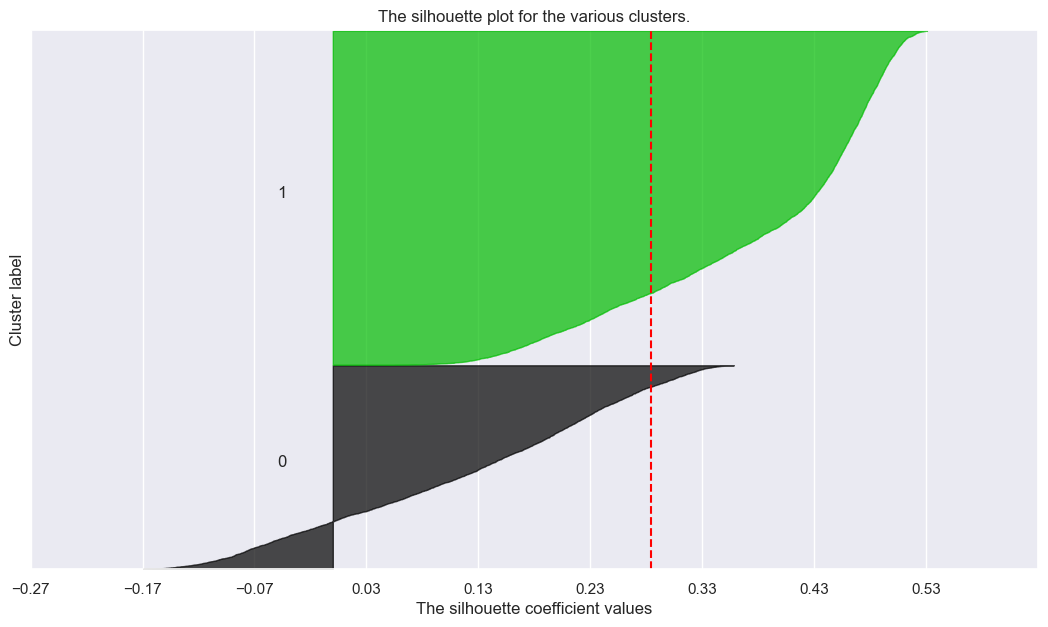

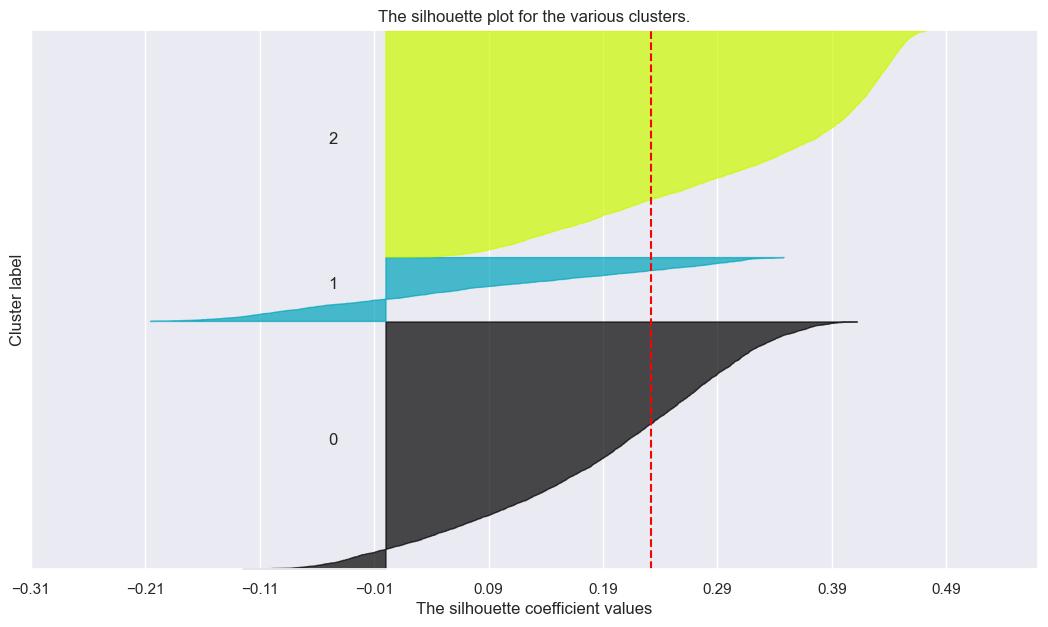

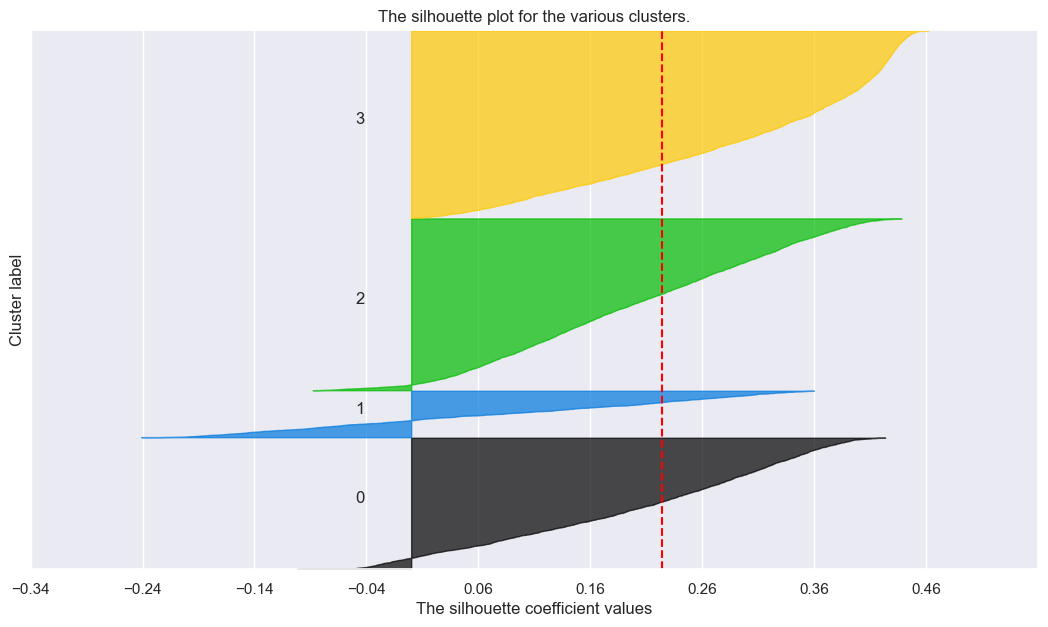

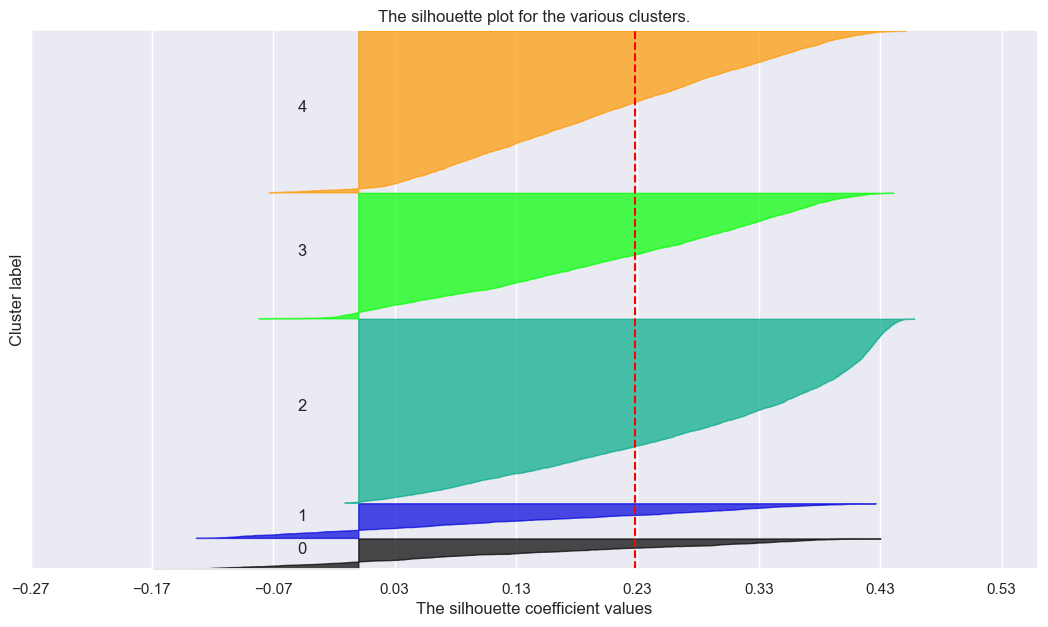

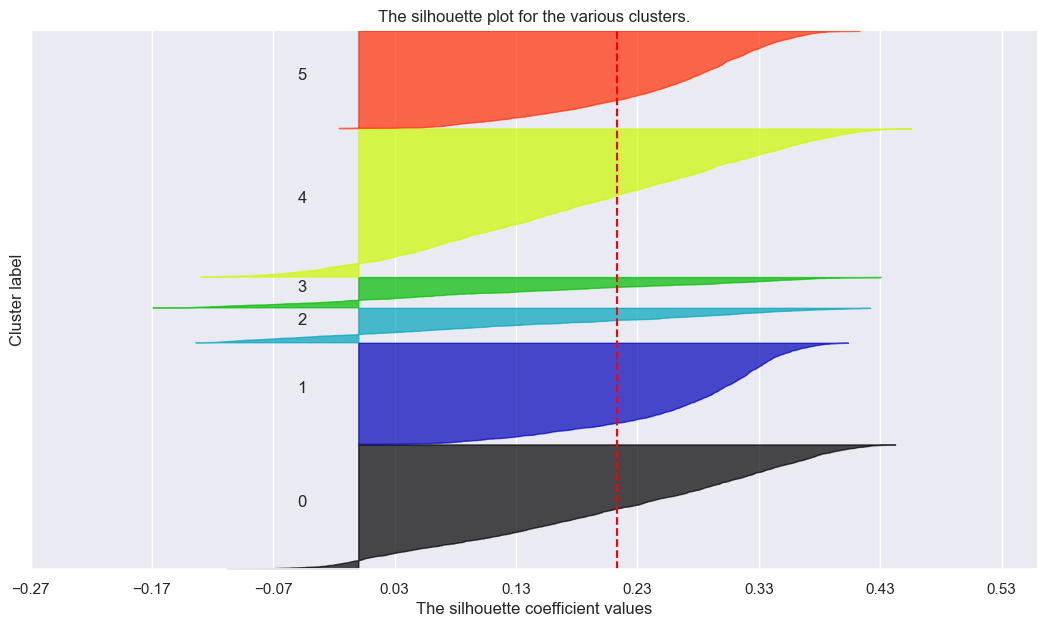

In [150]:
range_clusters = range(2, 7)

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kproto = KPrototypes(n_clusters=nclus, init='Cao',verbose=2, random_state=1)
    cluster_labels = kproto.fit_predict(dfInsurance,categorical=[5])
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(dfInsurance, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfInsurance, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(dfInsurance) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [29]:
kp_ins = KPrototypes(n_clusters=5, init='Cao', n_init=5, verbose=1)

# Fit the model to the data
kp_ins.fit(dfInsurance, categorical=[5])

# Predict the clusters for each data point
clusters_ins = kp_ins.predict(dfInsurance, categorical=[5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2001, ncost: 19627.656865818142
Run: 1, iteration: 2/100, moves: 2231, ncost: 17680.899418340923
Run: 1, iteration: 3/100, moves: 922, ncost: 17476.666896769893
Run: 1, iteration: 4/100, moves: 275, ncost: 17445.06295135174
Run: 1, iteration: 5/100, moves: 158, ncost: 17433.225114527824
Run: 1, iteration: 6/100, moves: 102, ncost: 17426.767782680065
Run: 1, iteration: 7/100, moves: 67, ncost: 17422.181259320372
Run: 1, iteration: 8/100, moves: 76, ncost: 17418.996048163033
Run: 1, iteration: 9/100, moves: 50, ncost: 17416.87554145253
Run: 1, iteration: 10/100, moves: 43, ncost: 17415.144498951784
Run: 1, iteration: 11/100, moves: 39, ncost: 17412.588131437402
Run: 1, iteration: 12/100, moves: 29, ncost: 17410.8784580065
Run: 1, iteration: 13/100, moves: 11, ncost: 17410.555981252
Run: 1, iteration: 1

In [630]:
df_concat = pd.concat((dfInsurance, pd.Series(clusters_ins , name='labels_insurance')), axis=1)
df_concat.groupby('labels_insurance').mean()

,MotorPercentageSpent,HouseholdPercentageSpent,HealthPercentageSpent,LifePercentageSpent,WorkPercentageSpent,Cancelled_1,ClaimsRate
labels_insurance,,,,,,,
0.0,0.067930,0.117797,0.069986,0.251840,0.237567,0.209073,-0.036706
1.0,0.017614,0.145581,0.101346,0.319144,0.299834,0.211795,-0.057342
2.0,0.024038,0.119297,0.113111,0.366573,0.302191,0.238596,-0.050193
3.0,0.050754,0.124299,0.068645,0.280109,0.300804,0.224125,-0.075691
4.0,0.040027,0.128811,0.086923,0.296702,0.287015,0.200574,-0.067756


In [631]:
pd.DataFrame(clusters_ins)[0].value_counts()

1    3509
3    3081
4    2393
2     661
0     578
Name: 0, dtype: int64

In [ ]:
df_prototypes = df.copy()

In [32]:
df_prototypes['labels_demographic'] = clusters_dem
df_prototypes['labels_insurance'] = clusters_ins

In [33]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 3.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 3.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic

findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'SimSun' (simsun.ttc)

findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Fo

findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Agency FB' (AGENCYB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) 

findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaral.ttf) nor

findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Castellar' (CASTELAR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 

findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Segoe 

findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Microsof

findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TT

findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 1.25
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Marlett' (marlett.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal norma

findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 0.525
findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) n

findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 1.25
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.525
findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Vladimir Script' 

findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Medium ITC' (ERASMD.T

findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 0.25
findfont: score(<Font 'Montserrat' (Montserrat-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 1.535
findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Baskerville Old Face' (BASKVILL

findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) norma

findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0 to Arial ('C:\\Windows\\Fonts\\arial.ttf') with score of 0.050000.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=heavy:stretch=normal:size=13.0.
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal

findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.43
findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.43
findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.629999999999999
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal 900 normal>) = 10.145
findfont: score(<Font 'Lucida Console' (

findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.629999999999999
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.145
findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.43
findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.145
findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) nor

findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Ubuntu' (Ubuntu-Regular.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal 400 normal>) = 11.43
findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.43
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.4775
findfont: score(<Font 'Comic Sans MS' (comicbd.t

findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.43
findfont: score(<Font 'Kunstler Script' (KUNSTLER.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.43
findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 0.14500000000000002
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.43
findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Corbel' (corbeli.ttf) ital

findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.43
findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal 400 condensed>) = 10.629999999999999
findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal 300 normal>) = 10.525
findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.43
findfont: score(<F

findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.43
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.43
findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Broadway' (BROADW.TTF) n

findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.145
findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal 900 normal>) = 10.145
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.629999999999999
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.43
findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.43
findfont: score(<Font 'Consolas' (c

findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeThreeSym' (STIXSi

findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 0.5349999999999999
findfont: score(<Font 'Kunstler Script' (KUNSTLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Calisto MT' (CALIST.TTF

findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bo

findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft Sans Serif' (micr

findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEB.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal

findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Centaur' (CENTAUR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) norma

findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 0.5349999999999999
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: sco

findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal 600 normal>) = 11.24
findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.0975
findfont: score(<Font 'Engravers MT' (ENGR.TTF) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Palatino Linotype' (palabi.ttf)

findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Fo

findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ubuntu' (Ubuntu-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Brush Script MT' (BRUSHSCI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Book Antiqua' (BKANT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal 

findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.1545
findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI Symb

findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Garamond' (G

findfont: score(<Font 'Brush Script MT' (BRUSHSCI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Fran

findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF)

findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 0.525
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 norm

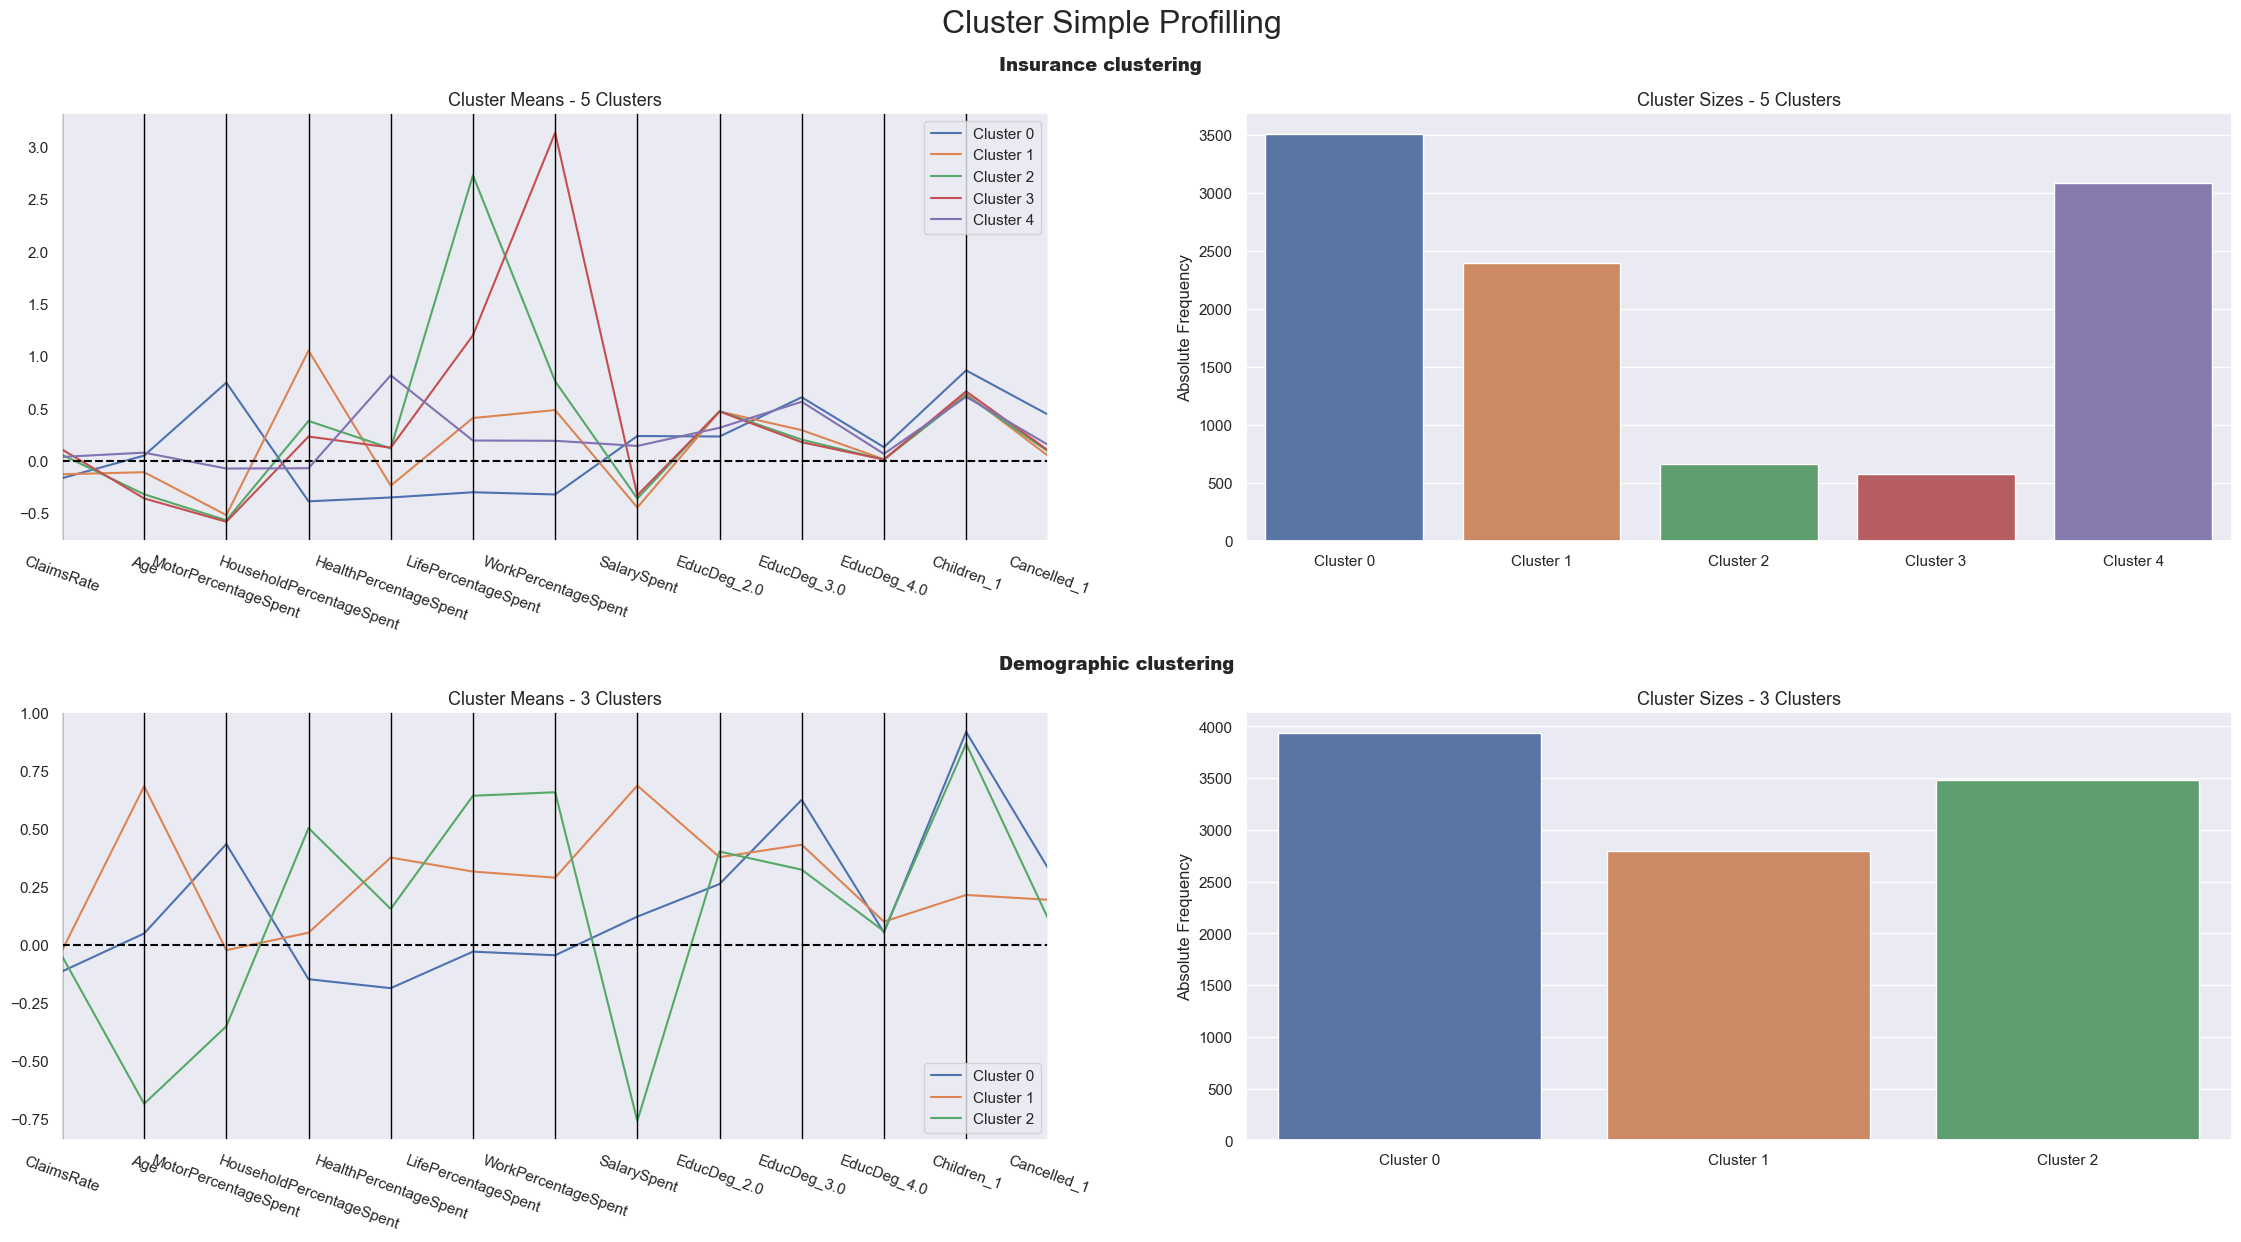

In [34]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df_prototypes = df_prototypes[df_prototypes.columns.to_list()], 
    label_columns = ['labels_insurance', 'labels_demographic'], 
    figsize = (28, 13), 
    compar_titles = ["Insurance clustering", "Demographic clustering"]
)

<hr>
<a class="anchor" id="3">
    
# 3. K-Means
    
</a>

In [93]:
non_metric_features = ["EducDeg_2.0", "EducDeg_3.0","EducDeg_4.0","Children_1","Cancelled_1"]
metric_features = df.columns.drop(non_metric_features).to_list()

In [94]:
df_means = df[metric_features].copy()

In [95]:
insurance_features_ohc=[
    'MotorPercentageSpent',
    'HouseholdPercentageSpent',
    'HealthPercentageSpent',
    'LifePercentageSpent',
    'WorkPercentageSpent',
    "ClaimsRate"
]


dfInsurance=df[insurance_features_ohc]


demographic_features_ohc=[
    'SalarySpent',
    'Age'
]
dfDemographic=df[demographic_features_ohc]

## dfInsurance

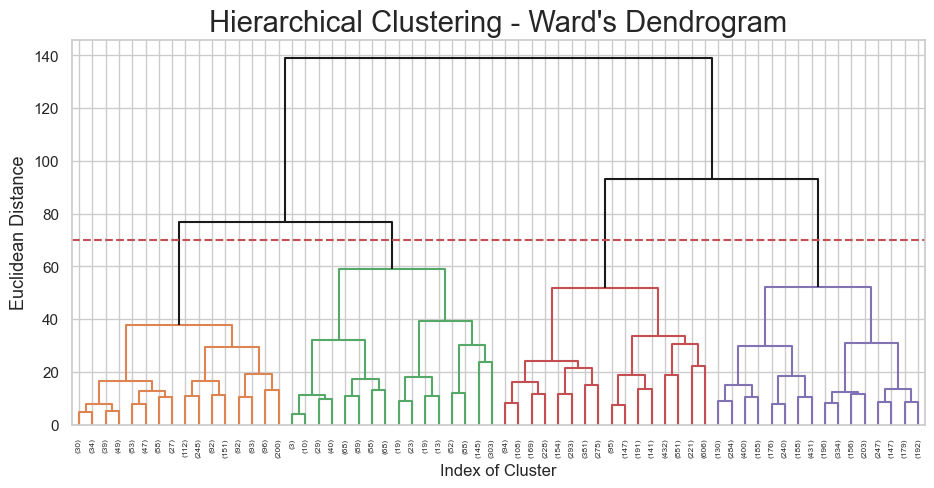

In [96]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust_labels = hclust.fit_predict(dfInsurance)

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
sns.set_style(style="whitegrid")
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 70
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Index of Cluster')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [97]:
# final cluster solution - Insurance
number_clusters = 4
kmclust =  KMeans(n_clusters = number_clusters,init='k-means++',n_init=200,random_state=42)
km_labels_insurance = kmclust.fit_predict(dfInsurance)
km_labels_insurance

array([3, 2, 2, ..., 3, 2, 3])

In [98]:
# Characterizing the final clusters
df_concat = pd.concat((dfInsurance, pd.Series(km_labels_insurance, name='labels_ins')), axis=1)
df_concat.groupby('labels_ins').mean()


,MotorPercentageSpent,HouseholdPercentageSpent,HealthPercentageSpent,LifePercentageSpent,WorkPercentageSpent,ClaimsRate
labels_ins,,,,,,
0.0,0.055208,0.116799,0.069462,0.283074,0.300900,-0.079610
1.0,0.034202,0.135699,0.092778,0.298361,0.276551,-0.067124
2.0,0.030338,0.137936,0.086422,0.309032,0.299102,-0.029379
3.0,0.019293,0.143427,0.102232,0.314880,0.300541,-0.058648


## dfDemographic

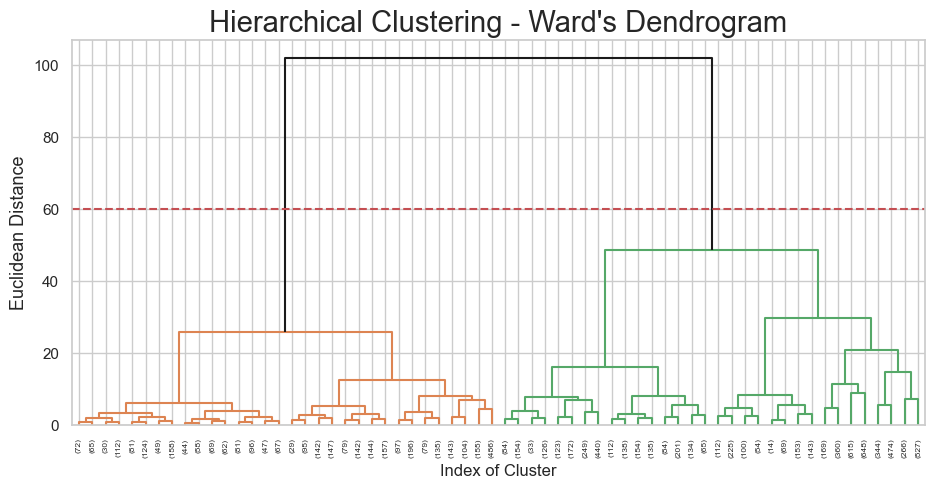

In [99]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust_labels = hclust.fit_predict(dfDemographic)

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
sns.set_style(style="whitegrid")
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 60
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Index of Cluster')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [100]:
# final cluster solution - Demographic
number_clusters = 2
kmclust =  KMeans(n_clusters = number_clusters,init='k-means++',n_init=200,random_state=42)
km_labels_demographic = kmclust.fit_predict(dfDemographic)
km_labels_demographic

array([0, 0, 0, ..., 1, 0, 0])

In [101]:
# Characterizing the final clusters
df_concat = pd.concat((dfDemographic, pd.Series(km_labels_demographic, name='labels_dem')), axis=1)
df_concat.groupby('labels_dem').mean()

,SalarySpent,Age
labels_dem,,
0.0,-0.029252,-0.023205
1.0,-0.018236,-0.027573


In [102]:
df_means['labels_dem'] = km_labels_demographic
df_means['labels_ins'] = km_labels_insurance

In [ ]:
## Merging both using hierarchical clustering

In [136]:
# Centroids of the concatenated cluster labels
df_centroids = df_means.groupby(['labels_dem','labels_ins']).mean()
df_centroids

ClaimsRate       Age  MotorPercentageSpent  \
labels_dem labels_ins                                               
0          0             0.025822 -0.552654             -0.111757   
           1            -0.129456 -0.681683             -0.651248   
           2             0.124902 -0.828883             -0.693952   
           3            -0.174746 -0.367720              0.631216   
1          0             0.045469  0.574380             -0.068347   
           1            -0.116583  0.562124             -0.434145   
           2             0.086261  0.534825             -0.363689   
           3            -0.165292  0.228846              0.782667   

                       HouseholdPercentageSpent  HealthPercentageSpent  \
labels_dem labels_ins                                                    
0          0                          -0.025505               0.818901   
           1                           1.213742              -0.313447   
           2                           0.312653               0.088574   
           3                          -0.303478              -0.211484   
1          0                          -0.075395               0.773788   
           1                           0.897969              -0.192030   
           2                          -0.139009               0.337783   
           3                          -0.409725              -0.408363   

                       LifePercentageSpent  WorkPercentageSpent  SalarySpent  
labels_dem labels_ins                                                         
0          0                      0.199166             0.204723    -0.502007  
           1                      0.611206             0.609121    -0.905331  
           2                      2.355601             2.413363    -0.816903  
           3                     -0.295273            -0.323892    -0.306656  
1          0                      0.243464             0.221569     0.638192  
           1                      0.479791             0.431573     0.077828  
           2                      1.922399             2.066755     0.626637  
           3                     -0.303595            -0.320750     0.462510

In [137]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

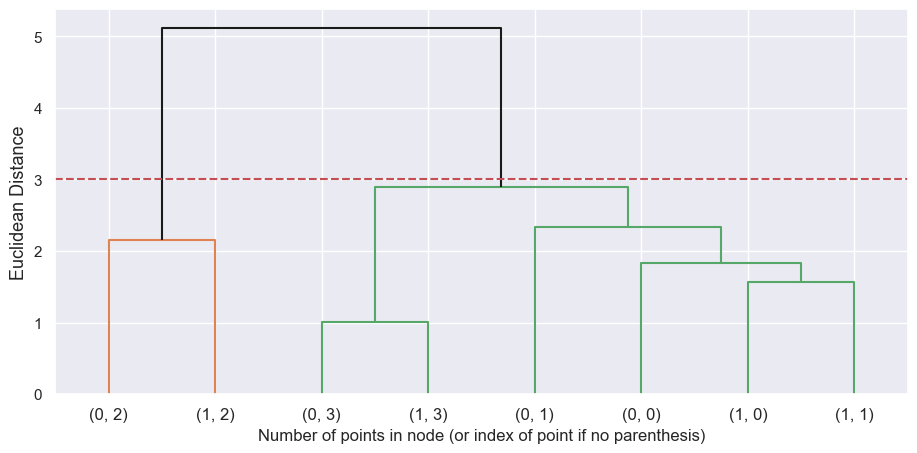

In [138]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 3
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
#plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [139]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='complete', 
    affinity='euclidean', 
    n_clusters=2
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

ClaimsRate       Age  MotorPercentageSpent  \
labels_dem labels_ins                                               
0          0             0.025822 -0.552654             -0.111757   
           1            -0.129456 -0.681683             -0.651248   
           2             0.124902 -0.828883             -0.693952   
           3            -0.174746 -0.367720              0.631216   
1          0             0.045469  0.574380             -0.068347   
           1            -0.116583  0.562124             -0.434145   
           2             0.086261  0.534825             -0.363689   
           3            -0.165292  0.228846              0.782667   

                       HouseholdPercentageSpent  HealthPercentageSpent  \
labels_dem labels_ins                                                    
0          0                          -0.025505               0.818901   
           1                           1.213742              -0.313447   
           2                           0.312653               0.088574   
           3                          -0.303478              -0.211484   
1          0                          -0.075395               0.773788   
           1                           0.897969              -0.192030   
           2                          -0.139009               0.337783   
           3                          -0.409725              -0.408363   

                       LifePercentageSpent  WorkPercentageSpent  SalarySpent  \
labels_dem labels_ins                                                          
0          0                      0.199166             0.204723    -0.502007   
           1                      0.611206             0.609121    -0.905331   
           2                      2.355601             2.413363    -0.816903   
           3                     -0.295273            -0.323892    -0.306656   
1          0                      0.243464             0.221569     0.638192   
           1                      0.479791             0.431573     0.077828   
           2                      1.922399             2.066755     0.626637   
           3                     -0.303595            -0.320750     0.462510   

                       hclust_labels  
labels_dem labels_ins                 
0          0                       0  
           1                       0  
           2                       1  
           3                       0  
1          0                       0  
           1                       0  
           2                       1  
           3                       0

In [140]:
df_centroids['hclust_labels'].to_dict()

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 1,
 (0, 3): 0,
 (1, 0): 0,
 (1, 1): 0,
 (1, 2): 1,
 (1, 3): 0}

In [141]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df_means.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels_kmeans'] = df_.apply(
    lambda row: cluster_mapper[
        (row['labels_dem'], row['labels_ins'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels_kmeans').mean()


,ClaimsRate,Age,MotorPercentageSpent,HouseholdPercentageSpent,HealthPercentageSpent,LifePercentageSpent,WorkPercentageSpent,SalarySpent,labels_dem,labels_ins
merged_labels_kmeans,,,,,,,,,,
0,-0.084384,0.004935,0.100944,0.125925,0.075389,0.112302,0.095208,0.005182,0.576540,1.411891
1,0.111746,-0.364576,-0.581506,0.158874,0.173423,2.208107,2.295352,-0.325416,0.340474,2.000000


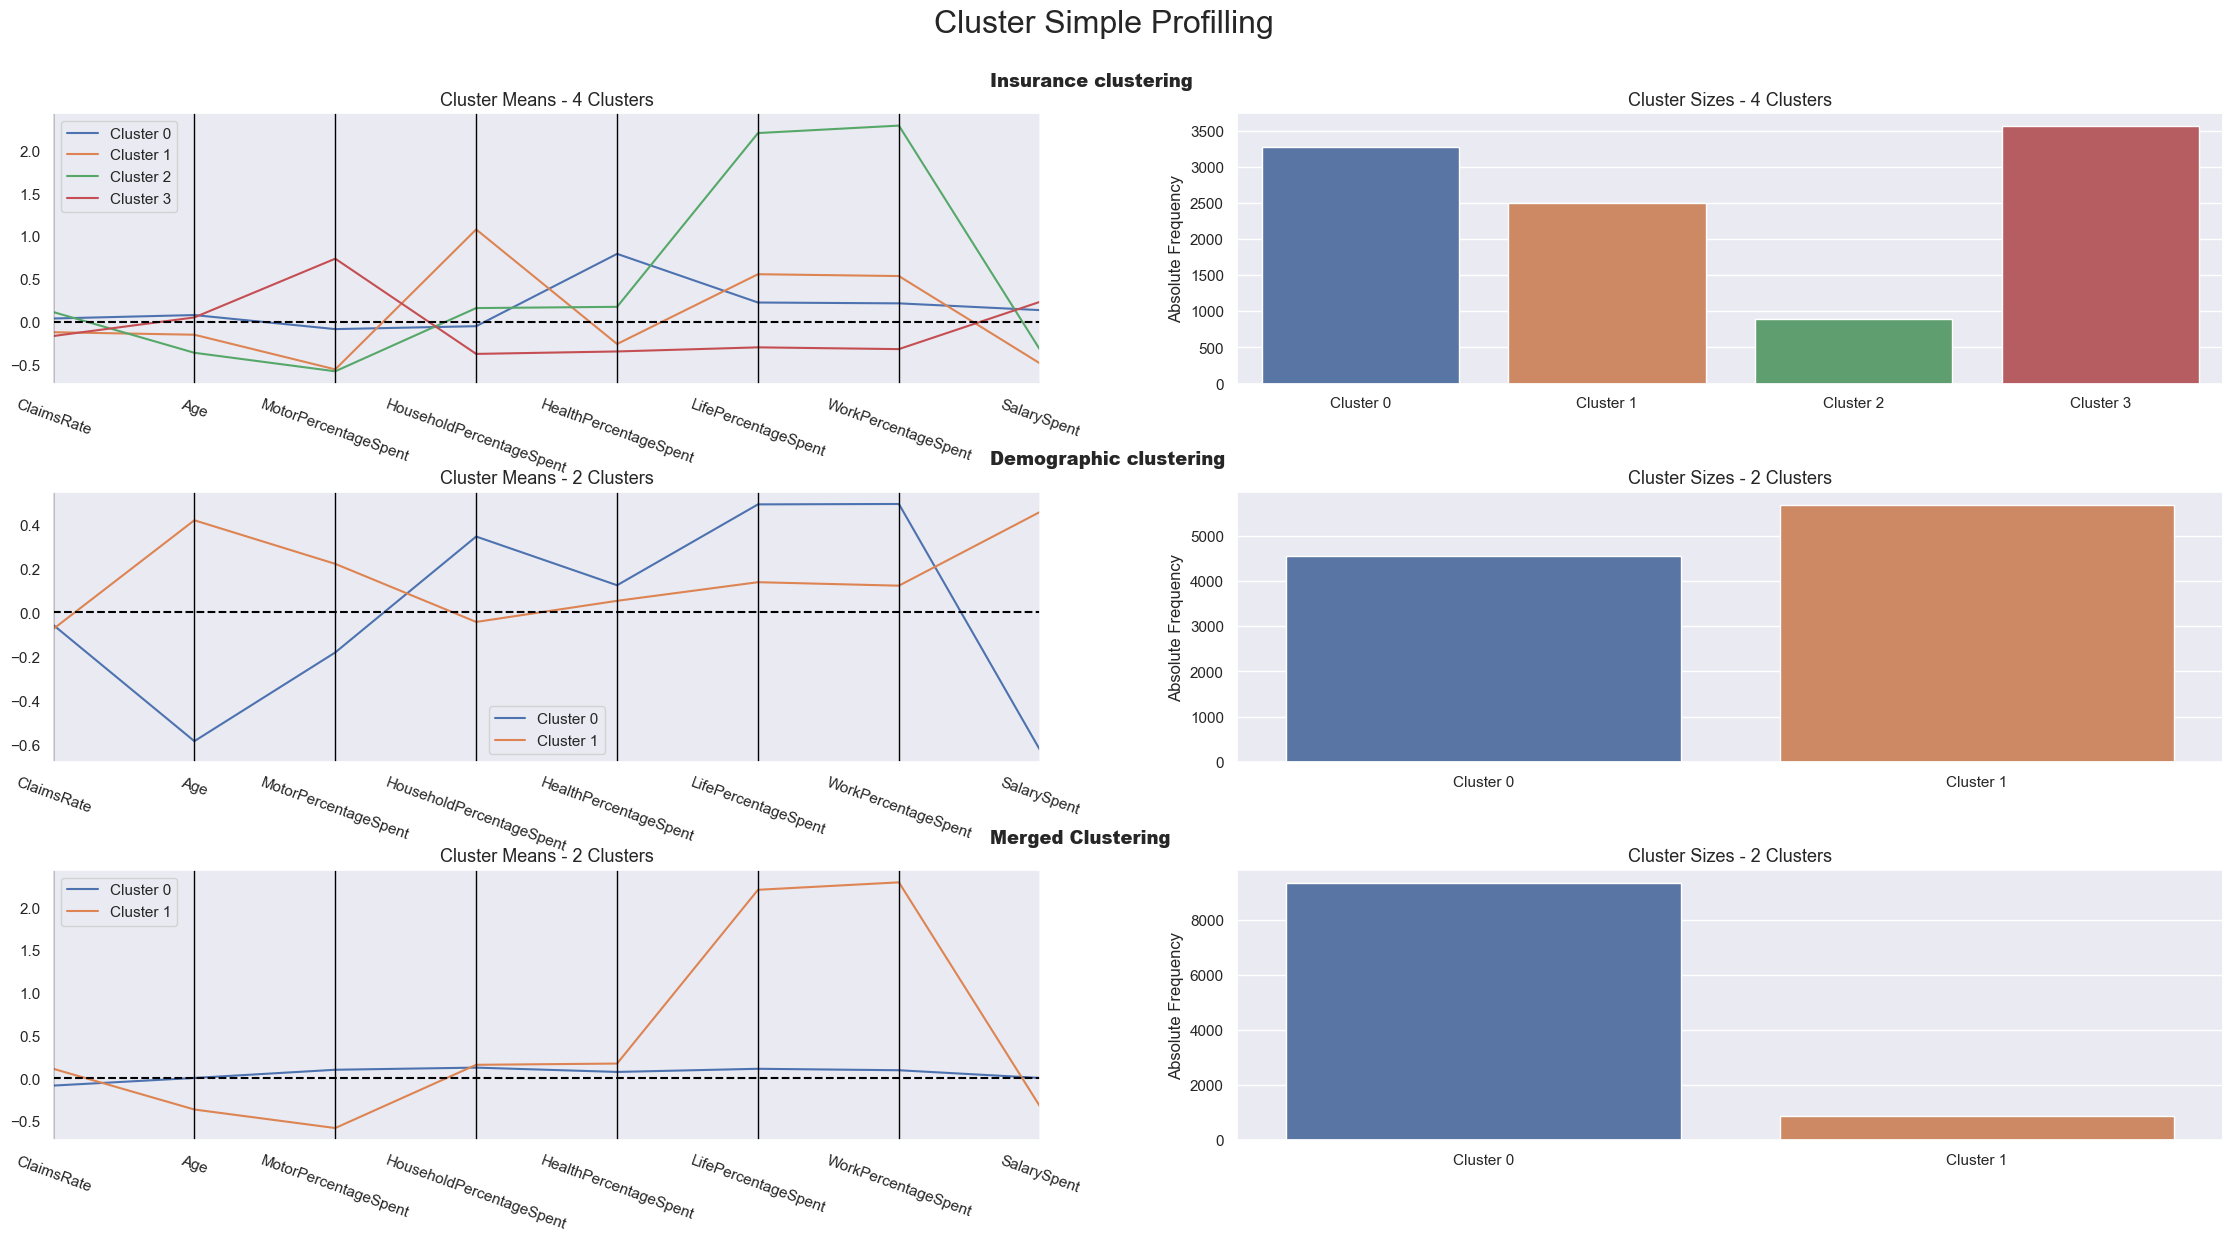

In [145]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_[df_.columns.to_list()], 
    label_columns = ['labels_ins', 'labels_dem','merged_labels_kmeans'], 
    figsize = (28, 13), 
    compar_titles = ["Insurance clustering", "Demographic clustering",'Merged Clustering']
)

<hr>
<a class="anchor" id="4">
    
# 4. K-Medoids    
</a>

In [104]:
insurance_features_ohc=[
    'MotorPercentageSpent',
    'HouseholdPercentageSpent',
    'HealthPercentageSpent',
    'LifePercentageSpent',
    'WorkPercentageSpent',
    'Cancelled_1',
    "ClaimsRate"
]


dfInsurance=df[insurance_features_ohc]


demographic_features_ohc=[
    'SalarySpent',
    'Children_1',
    'EducDeg_2.0',
    'EducDeg_3.0',
    'EducDeg_4.0',
    'Age'
]
dfDemographic=df[demographic_features_ohc]

In [105]:
df_medoids = df.copy()

### dfDemographic

In [106]:
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(dfDemographic)

In [108]:
kmedoids_labels_demographic = kmedoids.labels_
kmedoids_labels_demographic

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [109]:
# Characterizing the final clusters
df_concat = pd.concat((dfDemographic, pd.Series(kmedoids_labels_demographic , name='km_labels_dem')), axis=1)
df_concat.groupby('km_labels_dem').mean()

,SalarySpent,Children_1,EducDeg_2.0,EducDeg_3.0,EducDeg_4.0,Age
km_labels_dem,,,,,,
0.0,-0.015857,0.713705,0.337398,0.473868,0.068525,-0.026159
1.0,-0.032703,0.696374,0.351634,0.458887,0.069203,-0.024946


### dfInsurance

In [115]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(dfInsurance)

In [116]:
kmedoids_labels_insurance = kmedoids.labels_
kmedoids_labels_insurance

array([0, 2, 2, ..., 0, 2, 0], dtype=int64)

In [117]:
# Characterizing the final clusters
df_concat = pd.concat((dfInsurance, pd.Series(kmedoids_labels_insurance , name='km_labels_ins')), axis=1)
df_concat.groupby('km_labels_ins').mean()

,MotorPercentageSpent,HouseholdPercentageSpent,HealthPercentageSpent,LifePercentageSpent,WorkPercentageSpent,Cancelled_1,ClaimsRate
km_labels_ins,,,,,,,
0.0,0.009353,0.167062,0.087314,0.311286,0.299333,0.213087,-0.051312
1.0,0.045054,0.117153,0.086025,0.295025,0.312818,0.219084,-0.070418
2.0,0.038449,0.131035,0.090489,0.299877,0.274238,0.209487,-0.065924


In [118]:
df_medoids['km_labels_dem'] = kmedoids_labels_demographic
df_medoids['km_labels_ins'] = kmedoids_labels_insurance

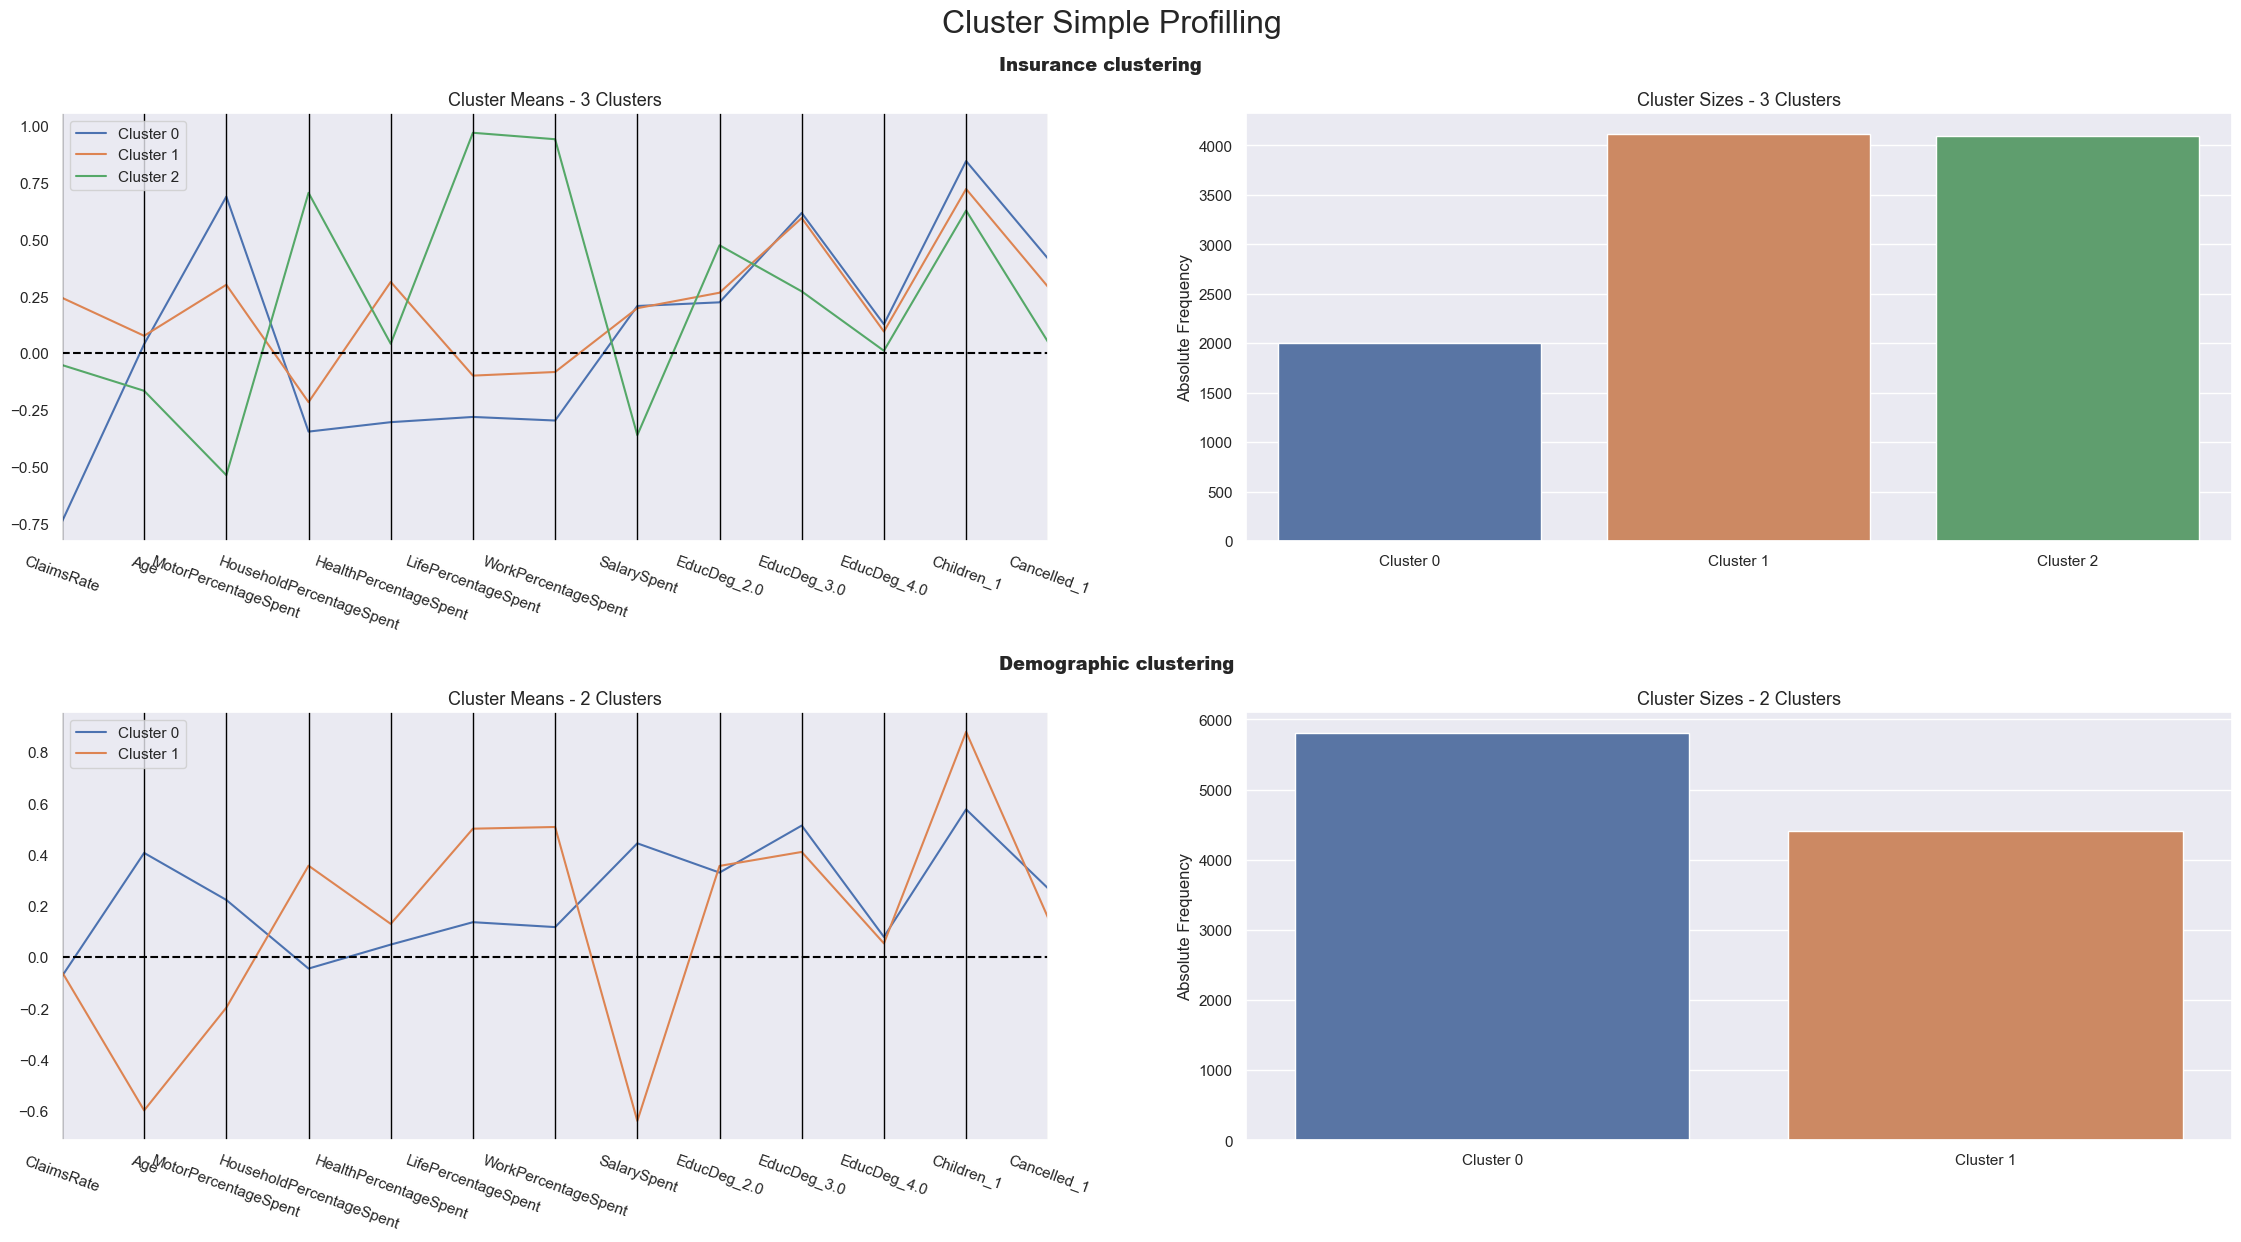

In [119]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_medoids[df_medoids.columns.to_list()], 
    label_columns = ['km_labels_ins', 'km_labels_dem'], 
    figsize = (28, 13), 
    compar_titles = ["Insurance clustering", "Demographic clustering"]
)